# 3. Classification and k-NN algorithm

## Simple classification problem 

So far we have only practiced manipulating information stored in datasets: how to download data, access and modify its contents, and execute basic preprocessing (dealing with missing values and errors in data). Now it is time to turn our attention towards more interesting questions. First, we start by downloading the familiar iris dataset, dropping out the sepal length and sepal width columns.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = pd.read_csv('datasets/iris/iris.csv').drop(columns = ['sepal_length','sepal_width'])
iris

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


This simplified dataset now describes each sample with three attributes: two numerical features and one categorical feature denoting the species of the sample. Consider now the following question:

*Is it possible to predict the species of an iris flower sample, given its petal length and petal width?*

This is an example of a **classification problem**: finding a predictive mapping between a set of **input variables** (here petal length and petal width) and a **target variable** (here the species of iris flower). Historically, problems of this type were solved by first figuring out a set of rules for accomplishing the classification task, and then expressing these rules in terms of computer code. This approach gave rise to *expert systems*, so named because crafting the necessary rules often required considerable expertise on the field of study in question (in this example, botany).

*Machine learning* takes an entirely different sort of approach for solving classification tasks: the mapping between inputs and targets is found *automatically*, guided by data containing a large number of individual examples linking inputs to targets. This is the direction we wish to pursue here.  

First, let us take a look at a graphical representation of our data. Since our simplified dataset only has two input variables, each sample can conveniently be represented by a point in a plane coordinate system; the horizontal axis corresponds to the petal length, and the vertical axis to the petal width (both in cm). Also, the flower species can be indicated by coloring each data point with one of three possible colors, depending on the value of the target variable for that sample. The graphical representation is generated in the cell below, using the pandas `groupby` method.

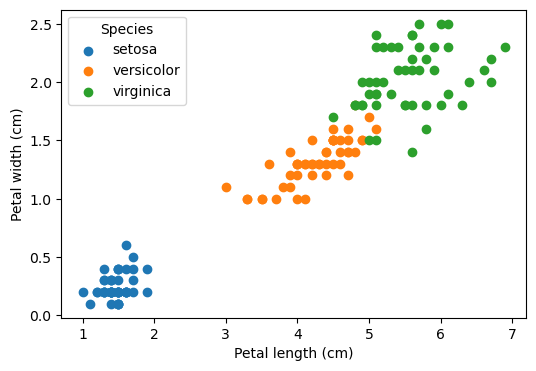

In [3]:
# Generate a scatter plot of the dataset (coloring by species)
fig, ax = plt.subplots(figsize=(6, 4))

for target_name, group in iris.groupby('species'):
    ax.scatter(group.petal_length, group.petal_width, label=target_name)

ax.legend(title='Species')
ax.set(xlabel = 'Petal length (cm)', ylabel = 'Petal width (cm)' )

plt.show()

The classification task involves trying to find a deterministic algorithm that predicts the iris species correctly in terms of the measured petal length and petal width values. This algorithm should be found on the basis of the information contained in our dataset: 150 samples with various values for the input variables, and the corresponding true value for the target variable. The data with which the *classifier* (i.e. the algorithm predicting the target class in terms of the given input values) is to be constructed is called the **training data**. Also, the broad category of machine learning that deals with labeled data (training data containing the true target values) is called **supervised learning**.

Note that we could attempt to solve this particular classification task just by inspecting the above graphical representation of the training data. To start with, all the samples in the "iris setosa" class (the blue dots) turn out have their petal length less than 2 cm, which gives an easy rule for their identification. However, this kind of approach to classification would be quite fragile. First, there is an infinite number of possible rules that produce good results with this simple dataset; which ones should we choose and why? Furthermore, once the training data contains more than two input variables, visualizing the data becomes much more difficult. Evidently, more general-purpose methods are needed. 

One of the many possible methods to handle classification tasks in supervised machine learning is the **k-nearest neighbors (k-NN)** algorithm. In the following, we shall build a k-NN classifier for the above iris flower problem.

## Basics of k-NN algorithm

Consider that we have a new iris flower sample, with its petal length measured as 3.2 cm, and petal width 1.3 cm. We wish to predict its species. Let us look at the graphical representation of our training data again, but with the new sample added to the graph as a black dot: 

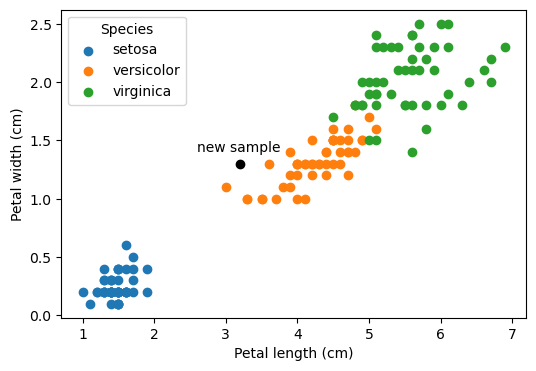

In [4]:
# Generate a scatter plot of the dataset (coloring by species)
fig, ax = plt.subplots(figsize=(6, 4))

for target_name, group in iris.groupby('species'):
    ax.scatter(group.petal_length, group.petal_width, label=target_name)
    
ax.plot([3.2], [1.3], 'o', c='black') # new flower sample data point 
ax.text(2.6, 1.4, 'new sample') # annotation text
ax.legend(title='Species')
ax.set(xlabel = 'Petal length (cm)', ylabel = 'Petal width (cm)' )

plt.show()

Most of us would probably agree that the predicted class should be "iris versicolor", because all the nearby training data points in the vicinity of the new sample belong to that class. This is the reasoning behind the k-NN algorithm: it starts by finding k closest data points in the training set to the data point to be classified. The parameter k (a positive integer, usually a small one) has to be supplied to the algorithm. The prediction for the class is then obtained as the most common class among these k training samples. 

However, there still remains the important question about what precisely is meant by the word *closest*. That is, we need a reasonable measure of *distance*. By far the most common way to define the distance $d$ between two samples $i$ and $j$ with input variable values $x_1^{(i)}$, $x_2^{(i)}$, ... and $x_1^{(j)}$, $x_2^{(j)}$, ..., respectively, is the **Euclidean distance**

$$
d = \sqrt{(x_1^{(i)} - x_1^{(j)})^2 + (x_2^{(i)} - x_2^{(j)})^2 + \hspace{1mm} ...}
$$

The Euclidean distance is usually a default choice whenever the input features are numerical, and vary on a continuous scale (such as in this example). As shown in the above definition, it can be easily generalized for an arbitrary number of input variables. If there are categorical variables among the input variables in the training set, defining the distance is less straightforward; we shall return to this question later.

## Scikit-learn implementation of k-NN

Because the idea behind the k-NN classifier is so simple and straightforward, it would be relatively easy to write a Python implementation for it directly, from scratch. This, however, is not necessary (or even advisable), because the **Scikit-learn** Python library includes a ready-made implementation for the k-NN algorithm, as well as many other tools of data analysis.

The code cell directly below shows how a k-NN classifier for our iris data is built with the Scikit-learn library. First, we import the `KNeighborsClassifier` class, and create an instance of the class, giving the value for k as a parameter (in this example, k = 3). Next, we extract the input variables and the target variable from the original `iris` DataFrame, and call the `fit` method of the classifier with the input DataFrame `X` and target Series `y` as arguments.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 3)
X = iris.drop(columns = 'species') # inputs
y = iris['species'] # targets
model.fit(X, y) # build the classifier

KNeighborsClassifier(n_neighbors=3)

The classifier is now built, and it can be used to predict the targets for any input variable values. To find the prediction for the new sample in the above example, we can now create a corresponding DataFrame, and give it as an argument to the `predict` method of the classifier: 

In [6]:
model.predict(pd.DataFrame({'petal_length': [3.2], 'petal_width':[1.3]}))

array(['versicolor'], dtype=object)

The predicted class is seen to be "versicolor", as expected.

## Feature scaling

In the iris example, both of the input features take on numerical values on roughly the same scale (a few centimeters). However, quite often this is not the case, and the input features may acquire values that vary on very different scales. In this case, it might be that one or a few of the attributes dominate the distance calculation between samples.

To avoid this situation, and to allow all the input features a roughly equal opportunity to affect the result of the classification, it is often advisable to apply *scaling* to the training data. A very common scaling procedure is called **standardization**. First, the mean values $\mu$ and standard deviations $\sigma$ are determined separately for each of the input features in the training set. The standardized value $z$ corresponding to an individual input feature value $x$ is then obtained as follows:

$$
z = \frac{x - \mu}{\sigma}
$$

After standardization, each training data column contains values with mean value of 0 and standard deviation 1.

A ready-made implementation for standardization is also provided by Scikit-learn, through the `StandardScaler` class and its `fit_transform()` method:

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns) # preserves column names

Next we build a classifier using the standardized dataset.

In [8]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_scaled, y) # build the classifier

KNeighborsClassifier(n_neighbors=3)

Note that target prediction now requires that the variable values of the samples to be predicted must be subjected to similar standardization as well:

In [9]:
X_new = pd.DataFrame({'petal_length': [3.2], 'petal_width':[1.3]})
X_new_scaled = pd.DataFrame(scaler.fit_transform(X_new), columns=X_scaled.columns)

model.predict(X_new_scaled)

array(['versicolor'], dtype=object)

It is also possible to work with NumPy arrays instead of DataFrames. In that case, however, the access to the column names is lost. Below is an example using the entire iris dataset (all four input variables included). Note how easily standardization can be implemented with NumPy arrays. 

In [10]:
iris_np = pd.read_csv('datasets/iris/iris.csv').values
X = iris_np[:, :4].astype(float)
y = iris_np[:, 4]
X_scaled = (X - np.mean(X, axis=0))/np.std(X, axis=0) # standardization
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=3)

Again, when the trained model is used for predicting new samples, the input variable values have to be standardized with the same values for mean and standard deviation as used before.

In [11]:
X_new = np.array([[5.0, 2.5, 3.2, 1.3]]) # sample input values (original)
X_new_scaled = (X_new - np.mean(X, axis=0))/np.std(X, axis=0) # standardized
model.predict(X_new_scaled)

array(['versicolor'], dtype=object)

# Evaluation metrics

Once the classifier has been built, it is evidently important to assess its quality. How successfully is the classifier able to predict the target class of the samples? 

First, we submit the entire training set of 150 samples to the trained model, and compare the predictions of the model to the known set of correct labels. The results of such comparisons, *i.e.* true labels vs. predicted labels, can be conveniently displayed in a form of a table called a **confusion matrix**. The implementation for finding out this matrix is available in Scikit-learn library, as shown in the code cell below:

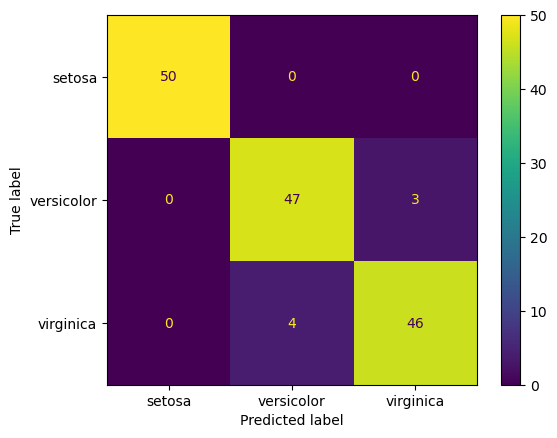

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_scaled)
cm = confusion_matrix(y, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['setosa','versicolor','virginica'])
cmd.plot()

The confusion matrix is fairly self-explanatory. From it, the following conclusions can be drawn:

- The model identifies all the 50 training samples of class "setosa" correctly.
- Three of the 50 samples of class "versicolor" are mistakenly classified as "virginica".
- Four of the 50 samples of class "virginica" are mistakenly classified as "versicolor".

Generally, the correct predictions are found in the diagonal of the confusion matrix, whereas any presence of off-diagonal elements indicate erroneous predictions.

Perhaps the most common metric used to indicate the performance of the classifier is the **accuracy**: the ratio of correct predictions to the total number of predictions. Accuracy can be expressed either as a number in the range between zero and one or, alternatively, as a percentage value. In the example shown above the accuracy of the model is (50 + 47 + 46)/150 = 143 / 150 $\approx$ 0,95 or 95 %.

However, in some situations, accuracy is not a very useful performance metric, *e.g.* if the class labels in the dataset are very unevenly distributed (some labels very common, some very rare). In these cases, additional metrics such as **precision** and **recall** might be more useful. These are defined as follows:

- Precision of a given class is the ratio of correct class predictions to the total number of *predictions* (given by the model) with that class. In the above example, consider the class "versicolor": as the model correctly identifies 47 samples with that class, and also predicts an additional 4 samples erroneously to that class, the class precision is 47 / 51 $\approx$ 0,92 or 92 %.
- Recall of a given class is the ratio of correct class predictions to the total number of samples belonging to that class. In the above example, consider the class "versicolor": as the model correctly identifies 47 samples with that class while failing to identify an additional 3 samples with that class, the class precision is 47 / 50 = 0,94 or 94 %.

An important special case of classification problems is that of **binary classification**: the target variable has only two mutually exclusive values. Such problems are very commonly encountered in many different situations: a tumor might be classified either malignant or benign, an e-mail as spam or not spam, a loan application as high risk or low risk, etc. Often the two classes are referred to as *positive* (having a certain condition) or *negative* (not having the condition), and the classifier needs to predict the correct one of these two options. 

In binary classification, the confusion matrix has 2 x 2 shape, and its four elements are referred to as
- True positives (TP): positive samples correctly identified by the model,
- False positives (FP): negative samples incorrectly identified by the model as positive,
- False negatives (FN): positive samples incorrectly identified by the model as negative,
- True negatives (TN): negative samples correctly identified by the model.

In terms of the above definitions, the metric parameters for binary classification are determined as follows:

accuracy = $\frac{TP+TN}{TP+FP+FN+TN}$

precision = $\frac{TP}{TP+FP}$

recall = $\frac{TP}{TP+FN}$

Accuracy gives the proportion of correct predictions given by the model, precision determines which proportion of the samples predicted to be positive by the model really are positive, and recall determines which proportion of the positive samples are identified by the model as being positive. Note that often precision and recall bear an inverse relationship to each other: increasing one tends to decrease the other. For example, improving recall (identifying more of the positive samples) means increasing the number of positive predictions; this tends to increase the number of *false* positives as well, thereby decreasing precision. This tradeoff should be kept in mind. 

At this point, it is important to note that actually the performance of a classifier should never be evaluated using the same data that the model was trained with. The quality and usefulness of a classifier is determined by how well it manages to classify *new, previously unseen samples*, not the ones for which we already know the correct labels. This is the central theme in the next module.  
